In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from generate_data import *

In [5]:
df = pd.read_csv("Data\\train.csv", nrows=10)

In [6]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = df.iloc[:,1:].values

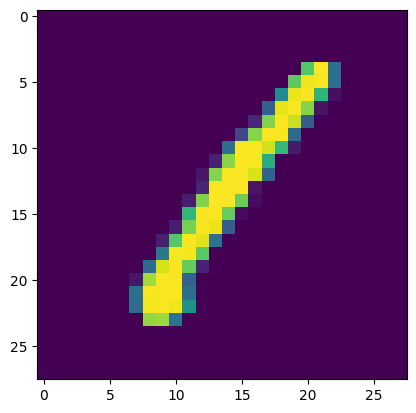

In [12]:
plt.imshow(X[0].reshape(28,28))
plt.show()

In [15]:
img = X[0].reshape(28,28)

In [20]:
# img
a = np.where(img != 0)

In [21]:
np.min(a[0])

4

In [22]:
np.max(a[0])

23

In [23]:
np.min(a[1])

7

In [24]:
np.max(a[1])

22

https://stackoverflow.com/questions/31400769/bounding-box-of-numpy-array

In [25]:
bbox = np.min(a[0]), np.max(a[0]), np.min(a[1]), np.max(a[1])

In [26]:
bbox

(4, 23, 7, 22)

In [30]:
img = img[bbox[0]:bbox[1],bbox[2]:bbox[3]]

In [31]:
pil_img = Image.fromarray(img.astype(np.uint8))
pil_img = pil_img.resize((28, 28), Image.LANCZOS)
img = np.array(pil_img)

C:\Users\Marcin\AppData\Local\Temp\ipykernel_15460\3826927709.py:2: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  pil_img = pil_img.resize((28, 28), Image.LANCZOS)


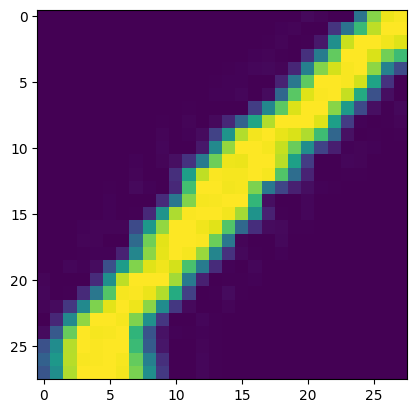

In [32]:
plt.imshow(img)

In [33]:
def find_bbox(img):
    a = np.where(img != 0)
    bbox = np.min(a[0]), np.max(a[0]), np.min(a[1]), np.max(a[1])
    return bbox

def zoom_centre(img):
    bbox = find_bbox(img)
    img = img[bbox[0]:bbox[1],bbox[2]:bbox[3]]
    pil_img = Image.fromarray(img.astype(np.uint8))
    pil_img = pil_img.resize((28, 28), Image.LANCZOS)
    img = np.array(pil_img)
    return img


420


C:\Users\Marcin\AppData\Local\Temp\ipykernel_15460\3117493437.py:10: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  pil_img = pil_img.resize((28, 28), Image.LANCZOS)


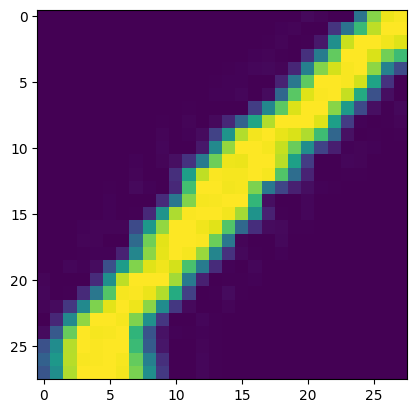

181


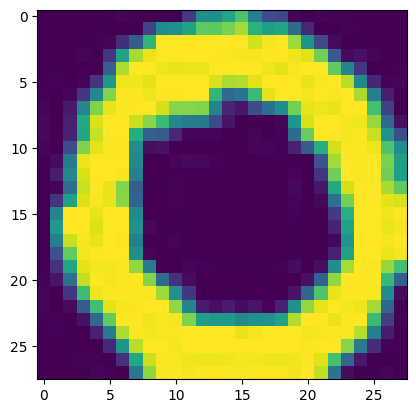

82


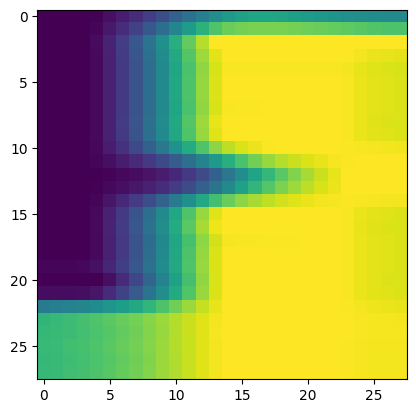

324


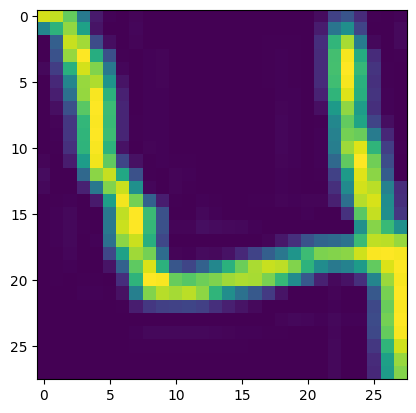

174


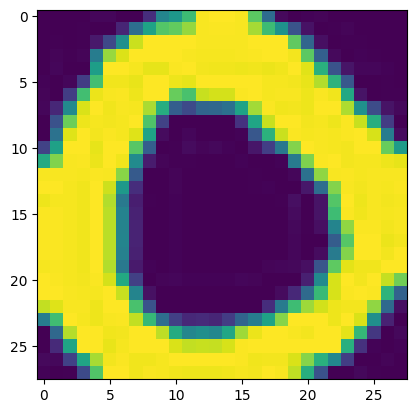

198


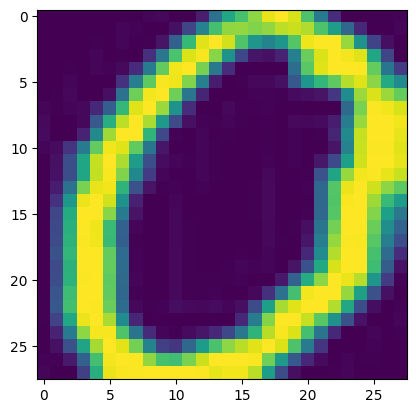

345


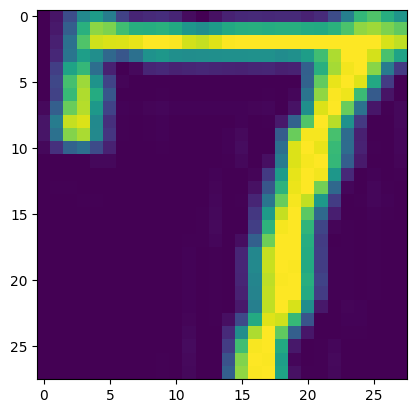

280


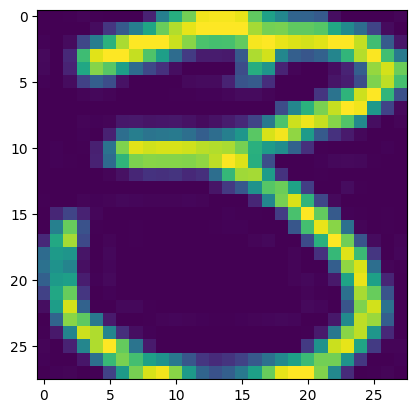

267


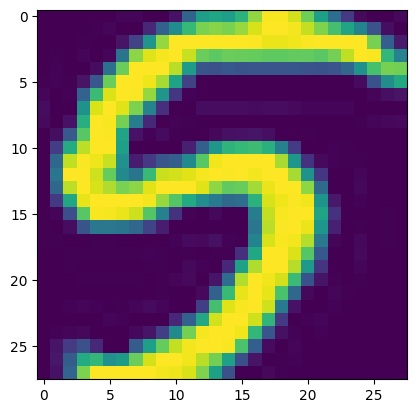

250


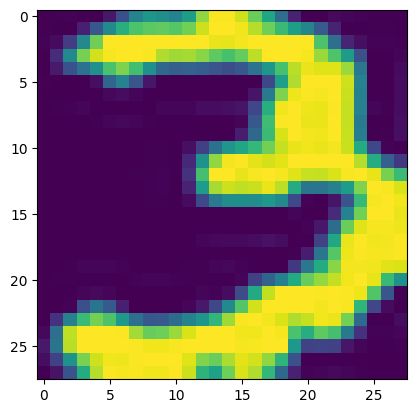

In [36]:
for i in range(X.shape[0]):
    img = zoom_centre(X[i].reshape(28, 28))
    plt.imshow(img)
    print(np.count_nonzero(img==0))
    plt.show()

In [ ]:
### Transform all digits
### AVG VALUE PLOT
### fit model
### Remove all with less zeros than n
### fit models

In [37]:
df = pd.read_csv("Data\\train.csv")

In [39]:
X = df.iloc[:,1:].values

In [40]:
for i in range(X.shape[0]):
    img = zoom_centre(X[i].reshape(28, 28))
    X[i] = img.flatten()

C:\Users\Marcin\AppData\Local\Temp\ipykernel_15460\3117493437.py:10: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  pil_img = pil_img.resize((28, 28), Image.LANCZOS)


In [41]:
df.iloc[:,1:] = X

In [42]:
def plot_avg_digit(df, rows=4, cols=3):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(8,8))

    i = 0
    for r in list(range(rows)):
        for c in list(range(cols)):
            arr = df[df["label"] == i].iloc[:,1:].mean().to_numpy().reshape((28,28))
            if np.all(np.isnan(arr)):
                i += 1
                fig.delaxes(ax[r,c])
                continue
            ax[r, c].imshow(arr, cmap="Greys")
            ax[r, c].set_title(i)
            i += 1


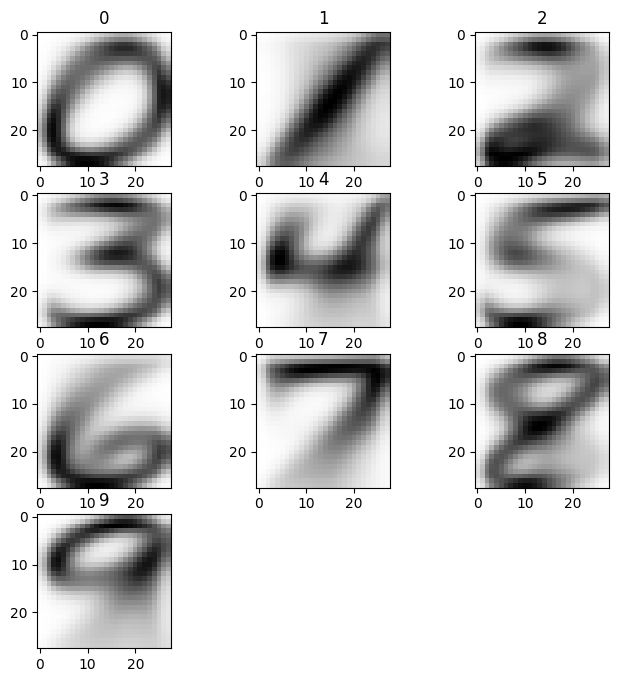

In [43]:
plot_avg_digit(df)

In [44]:
from sklearn import model_selection

seed = 0
X = df.iloc[:, 1:].copy().values
y = df['label'].copy().values

X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(metric="minkowski", n_neighbors=5, weights="distance")
knn.fit(X_train, y_train)
knn.score(X_val, y_val)

0.9716666666666667

In [47]:
from sklearn.svm import SVC
svc = SVC(C=0.1, gamma=1, kernel="poly")
svc.fit(X_train, y_train)
svc.score(X_val, y_val)

0.9785714285714285

In [50]:
y_predict = svc.predict(X_val)

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_val, y_predict)

array([[803,   2,   0,   1,   0,   0,   4,   1,   2,   0],
       [  0, 945,   8,   1,   0,   1,   1,   3,   1,   1],
       [  4,   2, 846,   1,   0,   0,   0,   1,   3,   3],
       [  0,   0,   9, 834,   0,   5,   0,   4,   7,   4],
       [  1,   7,   1,   1, 812,   0,   1,   0,   0,   4],
       [  0,   1,   0,   3,   1, 745,   4,   0,   2,   0],
       [  1,   1,   2,   0,   1,   1, 835,   0,   0,   0],
       [  0,   4,   4,   0,   4,   3,   0, 879,   0,   5],
       [  1,   5,   2,   6,   1,   5,   6,   1, 735,   6],
       [  4,   2,   1,   3,   5,   3,   0,   7,   1, 786]], dtype=int64)

In [73]:
df100 = df[df["label"] == 1].sample(300)

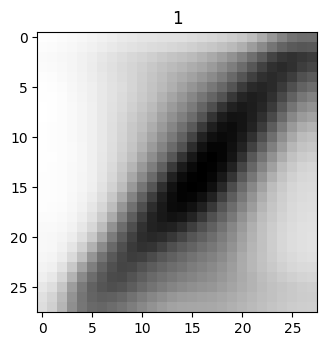

In [74]:
plot_avg_digit(df100, rows=2, cols=2)

In [75]:
from generate_data import *

In [76]:
c = generate_combinations({"rotate": [10, 30]})

In [77]:
X = df100.iloc[:, 1:].values
y = df100.iloc[:, 0].values

In [78]:
new_X = []
new_y = []

for i, label in enumerate(y):
    img = X[i].reshape(28,28)
    modified_imgs = process_image(img, c)

    l = len(modified_imgs)
    new_X += modified_imgs
    new_y += l * [label]

In [79]:
arr = np.concatenate((np.array([new_y], dtype="uint8").T, np.array(new_X, dtype="uint8")), axis = 1)
new_df = pd.DataFrame(arr, columns=df100.columns)


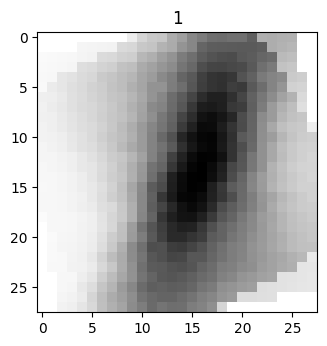

In [80]:
plot_avg_digit(new_df, rows=2, cols=2)

In [81]:
df_t = pd.concat([df, new_df])

In [83]:
from sklearn import model_selection

seed = 0
X = df_t.iloc[:, 1:].copy().values
y = df_t['label'].copy().values

X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)

In [84]:
from sklearn.svm import SVC
svc = SVC(C=0.1, gamma=1, kernel="poly")
svc.fit(X_train, y_train)
svc.score(X_val, y_val)

0.9803990610328639

In [86]:
y_pred = svc.predict(X_val)

In [88]:
confusion_matrix(y_val, y_pred)

array([[ 826,    0,    0,    0,    0,    1,    2,    0,    1,    0],
       [   0, 1028,    7,    0,    1,    2,    2,    2,    5,    0],
       [   2,    0,  811,    4,    1,    0,    1,    4,    4,    3],
       [   2,    1,    4,  845,    0,    7,    0,    5,    2,    2],
       [   1,    5,    1,    1,  845,    0,    1,    0,    1,    6],
       [   0,    0,    0,    8,    1,  734,    3,    0,    3,    0],
       [   3,    2,    0,    0,    1,    2,  857,    0,    2,    0],
       [   0,    8,    2,    0,    4,    0,    0,  838,    0,    4],
       [   0,    6,    0,    2,    3,    5,    0,    1,  748,    5],
       [   3,    2,    1,    5,    5,    1,    0,    3,    1,  821]],
      dtype=int64)